In [79]:
import os
import re
from pathlib import Path
from fastai.vision.data import (get_image_files, ImageDataBunch, imagenet_stats, create_cnn)
from fastai.vision.transform import get_transforms
from fastai.metrics import error_rate
from torchvision.models import resnet34
bs = 16

In [68]:
path_img = Path("/Users/robincole/Pictures/machinebox/birds_vs_not_birds")

In [69]:
fnames = get_image_files(path_img, recurse=True); len(fnames)

1015

In [70]:
fnames[0]

PosixPath('/Users/robincole/Pictures/machinebox/birds_vs_not_birds/not_birds/198-2018_02_10_20_11_39-motion-capture.jpg')

In [71]:
def get_labels(file_path : Path):
    """
    Helper to get directory label.
    """
    file_path = str(file_path)
    pattern = re.split('/', file_path)[-2]
    match = re.search(pattern, file_path)
    return match.group()

In [72]:
get_labels(fnames[0])

'not_birds'

In [76]:
data = ImageDataBunch.from_name_func(path_img, fnames, label_func=get_labels, ds_tfms=get_transforms(), size=224, bs=bs, num_workers=0).normalize(imagenet_stats)

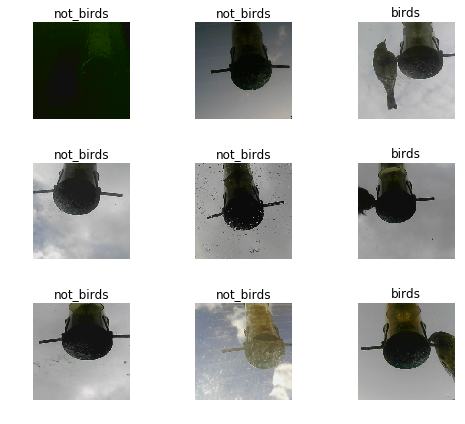

In [77]:
data.show_batch(rows=3, figsize=(7,6))

In [78]:
print(data.classes)
len(data.classes),data.c

['birds', 'not_birds']


(2, 2)

In [80]:
learn = create_cnn(data, resnet34, metrics=error_rate)

In [81]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [ ]:
%%time
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate
